![Finance Toolkit](https://github.com/JerBouma/FinanceToolkit/assets/46355364/198d47bd-e1b3-492d-acc4-5d9f02d1d009)

The Finance Toolkit is complimented very well with the [Finance Database 🌎](https://github.com/JerBouma/FinanceDatabase), a database that features 300.000+ symbols containing Equities, ETFs, Funds, Indices, Currencies, Cryptocurrencies and Money Markets. By utilising both, it is possible to do a fully-fledged competitive analysis with the tickers found from the FinanceDatabase inputted into the Finance Toolkit.

To install the **FinanceDatabase** it simply requires the following:

```
pip install financedatabase -U
```

From within Python use:

```python
import financedatabase as fd
```

For a detailed explanation of how to use the Finance Database, please see the GitHub page as found [here](https://github.com/JerBouma/FinanceDatabase).

In [1]:
from financetoolkit import Toolkit
import financedatabase as fd

API_KEY = "FINANCIAL_MODELING_PREP_API_KEY"

Lets start with searching for companies matching the industry `Road & Rail` in the `United States` that are defined as `Large Cap`.

In [2]:
# Initialize the Equities database
equities = fd.Equities()

# Obtain related companies
road_and_rail = equities.search(
    industry="Road & Rail",
    country="United States",
    market_cap="Large Cap",
    exclude_exchanges=True,
)

# Show the related DataFrame
road_and_rail

,name,summary,currency,sector,industry_group,industry,exchange,market,country,state,city,zipcode,website,market_cap,isin,cusip,figi,composite_figi,shareclass_figi
symbol,,,,,,,,,,,,,,,,,,,
CSX,CSX Corporation,"CSX Corporation, together with its subsidiarie...",USD,Industrials,Transportation,Road & Rail,NMS,NASDAQ Global Select,United States,FL,Jacksonville,32202,http://www.csx.com,Large Cap,US1264081035,126408103,BBG000BGK1N1,BBG000BGJRC8,BBG001S5Q7Q3
KSU,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
KSU-P,Kansas City Southern,"Kansas City Southern, a transportation holding...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,MO,Kansas City,64105,http://www.kcsouthern.com,Large Cap,NaN,NaN,NaN,NaN,NaN
NSC,Norfolk Southern Corporation,"Norfolk Southern Corporation, together with it...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,VA,Norfolk,23510-2191,http://www.norfolksouthern.com,Large Cap,US6558441084,655844108,BBG000BQ5GM4,BBG000BQ5DS5,BBG001S5TQJ6
UNP,Union Pacific Corporation,"Union Pacific Corporation, through its subsidi...",USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,NE,Omaha,68179,http://www.up.com,Large Cap,US9078181081,907818108,BBG000BW3413,BBG000BW3299,BBG001S5X2M0
WAB,Westinghouse Air Brake Technologies Corporation,Westinghouse Air Brake Technologies Corporatio...,USD,Industrials,Transportation,Road & Rail,NYQ,New York Stock Exchange,United States,PA,Pittsburgh,15212,http://www.wabteccorp.com,Large Cap,US9297401088,929740108,BBG000BDDBD5,BBG000BDD940,BBG001S5XBT3


It appears that Kansas City Southern has been merged with Canadian Pacific Railway ([source](https://www.kcsouthern.com/media/news/news-releases/canadian-pacific-and-kansas-city-southern-combination-approved-by-u-s-surface-transportation-board)). Because of this, the ticker is taken out. The reason it still exists in the dataset of the FinanceDatabase is to control for survivorship bias.

In [3]:
road_and_rail = road_and_rail.drop(["KSU", "KSU-P"])

From here on, the tickers from the dataset are used to initialize the Finance Toolkit.

In [4]:
rail_companies = Toolkit(list(road_and_rail.index), api_key=API_KEY)

Let's start by showing the historical prices and plotting them accordingly.

Adj Close                                         Close  \
                  CSX         NSC         UNP        WAB        CSX   
Date                                                                  
2023-05-23  31.497145  214.000000  195.057922  96.604729  31.610001   
2023-05-24  30.779715  210.979996  190.618011  94.528496  30.889999   
2023-05-25  30.809608  211.220001  191.909256  93.700005  30.920000   
2023-05-26  30.699999  210.570007  191.800003  94.739998  30.809999   
2023-05-30  30.969999  211.190002  194.199997  94.449997  30.969999   

                                                    High              ...  \
                   NSC         UNP        WAB        CSX         NSC  ...   
Date                                                                  ...   
2023-05-23  214.000000  196.380005  96.779999  31.980000  218.500000  ...   
2023-05-24  210.979996  191.910004  94.699997  31.500000  214.850006  ...   
2023-05-25  211.220001  193.210007  93.870003  31.070000  212.279999  ...   
2023-05-26  210.570007  193.100006  94.739998  31.000000  212.039993  ...   
2023-05-30  211.190002  194.199997  94.449997  31.120001  211.470001  ...   

                   Low                  Open                          \
                   UNP        WAB        CSX         NSC         UNP   
Date                                                                   
2023-05-23  194.860001  96.540001  31.690001  217.229996  198.190002   
2023-05-24  191.309998  94.669998  31.480000  212.649994  195.770004   
2023-05-25  190.710007  92.800003  30.700001  210.229996  191.059998   
2023-05-26  192.089996  93.599998  30.920000  211.220001  193.580002   
2023-05-30  191.220001  93.709999  30.719999  210.639999  192.110001   

                         Volume                             
                  WAB       CSX      NSC      UNP      WAB  
Date                                                        
2023-05-23  97.610001  11195500  2378300  2434100   830100  
2023-05-24  96.129997  15527400  1418300  2970800   803000  
2023-05-25  94.440002  11791100  1041300  2467500  1184200  
2023-05-26  94.510002  12295600  1145000  2287400  1152200  
2023-05-30  94.629997   9079400   851500  2453400  1090300  

[5 rows x 24 columns]

<Axes: xlabel='Date'>

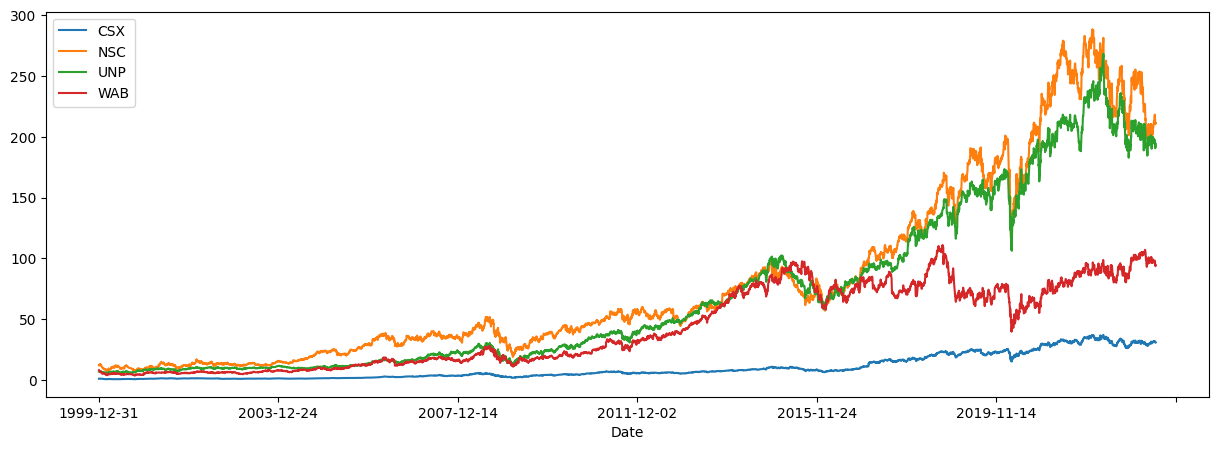

In [5]:
# Collect Historical Data for each ticker
historical_data = rail_companies.get_historical_data(start="2000-01-01")

# Show a portion of the dataset
display(historical_data.tail(5))

# Plot the Adjusted Close Prices
historical_data["Adj Close"].plot(figsize=(15, 5))

Let's have a look at the Balance Sheet Statement as well.

In [6]:
# Collect and show the Balance Sheet Statements
rail_companies.get_balance_sheet_statement()

date                                       2018         2019         2020  \
CSX Cash and Cash Equivalents         858000000    958000000   3129000000   
    Short Term Investments            253000000    996000000      2000000   
    Cash and Short Term Investments  1111000000   1954000000   3131000000   
    Accounts Receivable              1010000000    986000000    912000000   
    Inventory                         263000000    261000000    302000000   
...                                         ...          ...          ...   
WAB Minority Interest                         0     37100000     30400000   
    Total Liabilities and Equity     8645290000  18886200000  18454500000   
    Total Investments                         0            0            0   
    Total Debt                       3856873000   4333600000   3792200000   
    Net Debt                         3275965000   3729400000   3193500000   

date                                        2021         2022  
CSX Cash and Cash Equivalents         2239000000   1958000000  
    Short Term Investments              77000000    129000000  
    Cash and Short Term Investments   2316000000   2087000000  
    Accounts Receivable               1148000000   1313000000  
    Inventory                          339000000    341000000  
...                                          ...          ...  
WAB Minority Interest                   38000000     45000000  
    Total Liabilities and Equity     18454000000  18516000000  
    Total Investments                          0            0  
    Total Debt                        4056000000   4002000000  
    Net Debt                          3583000000   3461000000  

[172 rows x 5 columns]

A very important financial ratio is the "Operating Ratio" for railroad companies. An operating ratio of 80 or lower has generally been seen as good but having a target as low as the mid-70s is even better. From the table below, it is clear that all companies except for WAB (Westinghouse Air Brake Technologies Corporation) are performing very well. This, however, makes sense since WAB is specialized on providing parts instead of actual railroad services.

In [7]:
# Collect and show the Balance Sheet Statements
rail_companies.ratios.get_operating_ratio()

The following data was not provided within the Toolkit class and thus was retrieved from FinancialModelingPrep: Income Statement, Cash Flow Statement.


date,2018,2019,2020,2021,2022
CSX,0.610367,0.599062,0.589625,0.595831,0.619471
NSC,0.633793,0.646866,0.653999,0.60088,0.622676
UNP,0.626971,0.605952,0.598935,0.57173,0.601327
WAB,0.891502,0.919134,0.90147,0.888008,0.879096


Other than this ratio, important other metrics are revenue growth, strong profit margins and efficient capital management. These can be explored further by looking into the income statement, the profit margin ratio and the current ratio.

In [8]:
# Obtain the income statement and select the revenues
revenues = rail_companies.get_income_statement().loc[:, "Revenue", :]

# Show revenue absolute numbers for each company
display(revenues)

# Show the revenue growth for each company
display(revenues.pct_change(axis=1))

date,2018,2019,2020,2021,2022
CSX,12250000000,11937000000,10583000000,12522000000,14853000000
NSC,11458000000,11296000000,9789000000,11142000000,12745000000
UNP,22832000000,21708000000,19533000000,21804000000,24875000000
WAB,4363547000,8200000000,7556100000,7822000000,8362000000


date,2018,2019,2020,2021,2022
CSX,NaN,-0.025551,-0.113429,0.183218,0.186152
NSC,NaN,-0.014139,-0.133410,0.138216,0.143870
UNP,NaN,-0.049229,-0.100193,0.116265,0.140846
WAB,NaN,0.879205,-0.078524,0.035190,0.069036


Profit Margins can be looked at from a variety of perspectives. The Finance Toolkit features Gross, Operating, Net Profit and EBT Profit Margins. With the `collect_profitability_ratios` functions within the `ratios` module these can be collected for each company accompanied with many other useful ratios. To provide an appropriate overview, the profitability ratios are only shown for `CSX`.

In [9]:
# Collect the profitability ratios and select the ratios for CSX
rail_companies.ratios.collect_profitability_ratios().loc["CSX"]

date,2018,2019,2020,2021,2022
Gross Margin,0.389633,0.40831,0.41217,0.410478,0.389484
Operating Margin,0.397469,0.415934,0.41217,0.446734,0.405507
Net Profit Margin,0.270122,0.279048,0.261268,0.301949,0.280482
Interest Coverage Ratio,9.70266,8.686567,7.644562,9.195291,9.997305
Income Before Tax Profit Margin,0.351347,0.361565,0.342719,0.395384,0.364505
Effective Tax Rate,0.23118,0.228221,0.237662,0.236316,0.230513
Return on Assets (ROA),0.090092,0.087069,0.069485,0.093287,0.099399
Return on Equity (ROE),NaN,0.272742,0.221439,0.284179,0.318928
Return on Invested Capital (ROIC),0.114254,0.11244,0.091077,0.118135,0.12589
Return on Capital Employed (ROCE),0.141983,0.139949,0.115979,0.148128,0.156081


Capital Management can be viewed from multiple angles including liquidity, accounts receivable, inventory and accounts payable management. These lead to the Operating and Cash Conversion Cycles. All of these ratios can be found within the `collect_efficiency_ratios` and `collect_liquidity_ratios` functions within the `ratios` module.

In [10]:
# Collect the liquidity ratios for all companies
rail_companies.ratios.collect_liquidity_ratios()

date                                          2018        2019        2020  \
CSX Current Ratio                         1.339426    1.523942    2.199604   
    Quick Ratio                           1.107572    1.366806    2.002476   
    Cash Ratio                            0.580157    0.908415    1.550768   
    Working Capital                      650000000  1127000000  2422000000   
    Operating Cash Flow Ratio             2.423499    2.254765    2.111441   
    Operating Cash Flow to Sales Ratio    0.378857      0.4063    0.402816   
    Short Term Coverage Ratio            14.324074    23.77451   10.525926   
NSC Current Ratio                         0.718641    0.904783    1.073148   
    Quick Ratio                           0.527596    0.652174    0.908796   
    Cash Ratio                            0.138171    0.252174    0.516204   
    Working Capital                     -729000000  -219000000   158000000   
    Operating Cash Flow Ratio             1.438055    1.692174    1.683796   
    Operating Cash Flow to Sales Ratio    0.325188    0.344547    0.371539   
    Short Term Coverage Ratio             9.603093  -14.742424   68.622642   
UNP Current Ratio                         0.899914     0.79499    1.009825   
    Quick Ratio                           0.667531    0.571363    0.806135   
    Cash Ratio                            0.288154    0.204781    0.445483   
    Working Capital                     -463000000  -892000000    41000000   
    Operating Cash Flow Ratio             1.877648    1.978626    2.046489   
    Operating Cash Flow to Sales Ratio    0.380431    0.396582    0.437209   
    Short Term Coverage Ratio             5.345231    5.390733    5.578054   
WAB Current Ratio                         2.702189     1.28671    1.202554   
    Quick Ratio                           1.049187    0.696163    0.623377   
    Cash Ratio                            0.352773    0.185451    0.185569   
    Working Capital                     2802977000   934100000   653500000   
    Operating Cash Flow Ratio             0.191093    0.311694     0.24291   
    Operating Cash Flow to Sales Ratio    0.072114    0.123841    0.103718   
    Short Term Coverage Ratio              0.22441    0.445492    0.365327   

date                                           2021         2022  
CSX Current Ratio                          1.734438     1.557669  
    Quick Ratio                            1.551276     1.375961  
    Cash Ratio                              1.03717     0.844597  
    Working Capital                      1640000000   1378000000  
    Operating Cash Flow Ratio              2.283475     2.273978  
    Operating Cash Flow to Sales Ratio     0.407203     0.378307  
    Short Term Coverage Ratio              9.730916    10.723282  
NSC Current Ratio                           0.85958     0.757644  
    Quick Ratio                            0.719952     0.605512  
    Cash Ratio                             0.332804      0.17214  
    Working Capital                      -354000000   -642000000  
    Operating Cash Flow Ratio              1.687822     1.593809  
    Operating Cash Flow to Sales Ratio     0.381888     0.331267  
    Short Term Coverage Ratio            -27.101911    39.092593  
UNP Current Ratio                           0.61821     0.715942  
    Quick Ratio                             0.47493     0.527174  
    Cash Ratio                             0.175139     0.184601  
    Working Capital                     -2193000000  -1568000000  
    Operating Cash Flow Ratio              1.572423     1.696014  
    Operating Cash Flow to Sales Ratio     0.414236     0.376362  
    Short Term Coverage Ratio              5.676933     5.066017  
WAB Current Ratio                          1.316838     1.248053  
    Quick Ratio                            0.670103     0.594174  
    Cash Ratio                             0.162543     0.156043  
    Working Capital                       922000000    8600000

In [11]:
# Collect the efficiency ratios for all companies
rail_companies.ratios.collect_efficiency_ratios()

date                                                2018        2019  \
CSX Days of Inventory Outstanding (DIO)              NaN   13.539572   
    Days of Sales Outstanding (DSO)                  NaN   30.516043   
    Operating Cycle (CC)                             NaN   44.055615   
    Days of Accounts Payable Outstanding (DPO)       NaN   51.471046   
    Cash Conversion Cycle (CCC)                      NaN   -7.415431   
    Receivables Turnover                             NaN    0.083606   
    Inventory Turnover Ratio                         NaN   26.958015   
    Accounts Payable Turnover Ratio                  NaN    7.091365   
    SGA-to-Revenue Ratio                             0.0         0.0   
    Fixed Asset Turnover                             NaN    0.345284   
    Asset Turnover Ratio                             NaN    0.318379   
    Operating Ratio                             0.610367    0.599062   
NSC Days of Inventory Outstanding (DIO)              NaN   12.533501   
    Days of Sales Outstanding (DSO)                  NaN   31.165235   
    Operating Cycle (CC)                             NaN   43.698736   
    Days of Accounts Payable Outstanding (DPO)       NaN   62.695295   
    Cash Conversion Cycle (CCC)                      NaN  -18.996558   
    Receivables Turnover                             NaN    0.085384   
    Inventory Turnover Ratio                         NaN   29.121951   
    Accounts Payable Turnover Ratio                  NaN    5.821809   
    SGA-to-Revenue Ratio                       -0.005324   -0.005577   
    Fixed Asset Turnover                             NaN    0.321736   
    Asset Turnover Ratio                             NaN     0.30463   
    Operating Ratio                             0.633793    0.646866   
UNP Days of Inventory Outstanding (DIO)              NaN    22.52956   
    Days of Sales Outstanding (DSO)                  NaN    28.16358   
    Operating Cycle (CC)                             NaN    50.69314   
    Days of Accounts Payable Outstanding (DPO)       NaN   24.461096   
    Cash Conversion Cycle (CCC)                      NaN   26.232044   
    Receivables Turnover                             NaN     0.07716   
    Inventory Turnover Ratio                         NaN   16.200938   
    Accounts Payable Turnover Ratio                  NaN   14.921653   
    SGA-to-Revenue Ratio                             0.0         0.0   
    Fixed Asset Turnover                             NaN     0.38354   
    Asset Turnover Ratio                             NaN    0.359344   
    Operating Ratio                             0.626971    0.605952   
WAB Days of Inventory Outstanding (DIO)              NaN   80.679238   
    Days of Sales Outstanding (DSO)                  NaN   62.554724   
    Operating Cycle (CC)                             NaN  143.233961   
    Days of Accounts Payable Outstanding (DPO)       NaN   53.836236   
    Cash Conversion Cycle (CCC)                      NaN   89.397725   
    Receivables Turnover                             NaN    0.171383   
    Inventory Turnover Ratio                         NaN    4.524088   
    Accounts Payable Turnover Ratio                  NaN     6.77982   
    SGA-to-Revenue Ratio                        0.145121    0.142268   
    Fixed Asset Turnover                             NaN    0.868016   
    Asset Turnover Ratio                             NaN    0.595596   
    Operating Ratio                             0.891502    0.919134   

date                                                  2020        2021  \
CSX Days of Inventory Outstanding (DIO)          16.516235   15.846993   
    Days of Sales Outstanding (DSO)              32.730322   30.023159   
    Operating Cycle (CC)                         49.246558   45.870152   
    Days of Accounts Payable Outstanding (DPO)   54.330493   43.807911   
    Cash Conversion Cycle (CCC)                  -5.083936    2.062241   
    Receivables Turnover   